core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

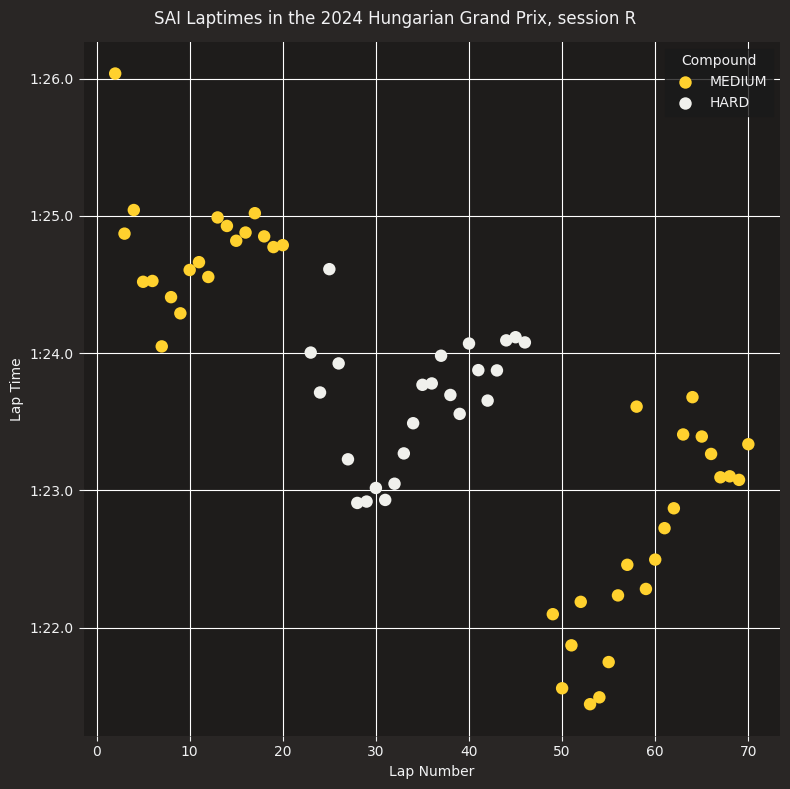

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

#fastf1.Cache.enable_cache('cache')

year = 2024
gran_prix ="Hungarian"
sessionG = 'R' #1 letter session

driver = "SAI" #3 letter driver

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')
#Load the race session.

race = fastf1.get_session(year, gran_prix, sessionG)
race.load()
#Get all the laps for a single driver. Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()

#Make the scattterplot using lap number as x-axis and lap time as y-axis. Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

# Make the plot more aesthetic.

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{driver} Laptimes in the {year} {gran_prix} Grand Prix, session {sessionG}")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-pack

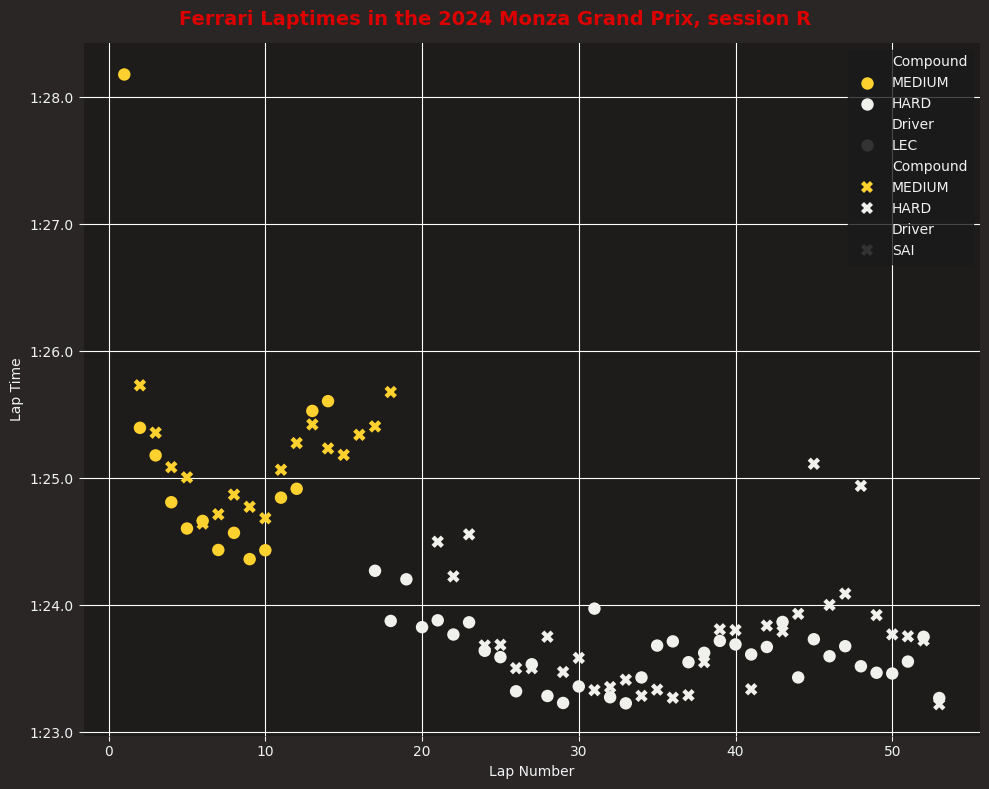

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2024
gran_prix = "Monza"
sessionG = 'R'  # Race session
team = "Ferrari"  # Replace with the team name you want to analyze

# Set up FastF1 and Matplotlib
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

# Load the race session
race = fastf1.get_session(year, gran_prix, sessionG)
race.load()

# Get all drivers from the specified team
team_drivers = race.results[race.results["TeamName"] == team]["Abbreviation"]

# Get all laps for the team's drivers, filtering out slow laps
team_laps = race.laps[race.laps["Driver"].isin(team_drivers)].pick_quicklaps().reset_index()

# Get the team's official color
team_color = fastf1.plotting.team_color(team)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define marker styles for each driver
marker_styles = {team_drivers[0]: "o", team_drivers[1]: "X"}  # "o" for first driver, "X" for second driver

# Use seaborn to plot lap times for all drivers in the team
for driver in team_drivers:
    driver_laps = team_laps[team_laps["Driver"] == driver]
    sns.scatterplot(
        data=driver_laps,
        x="LapNumber",
        y="LapTime",
        ax=ax,
        hue="Compound",  # Color by tire compound
        palette=fastf1.plotting.get_compound_mapping(session=race),  # Use FastF1's compound color mapping
        style="Driver",  # Differentiate drivers by marker style
        markers=marker_styles,  # Use custom marker styles
        s=80,  # Marker size
        linewidth=0,
        legend='auto'
    )

# Customize the plot
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.invert_yaxis()  # Invert y-axis for better visualization of lap times

# Set the title with the team's color
plt.suptitle(
    f"{team} Laptimes in the {year} {gran_prix} Grand Prix, session {sessionG}",
    color=team_color,  # Use the team's color for the title
    fontsize=14,
    fontweight='bold'
)

# Add grid and improve layout
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Show the plot
plt.show()